In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

url_repaso_parcial_identificacion = 'https://github.com/niconomist98/DataAnalyticsUQ/raw/refs/heads/main/Datos/EMICRON/emicron_identificacion.csv'

repaso_parcial_emicron_identificacion = pd.read_csv(url_repaso_parcial_identificacion)

repaso_parcial_emicron_identificacion.head() 

url_repaso_parcial_emprendimiento = 'https://github.com/willineitor/WILLIDATABASE/raw/refs/heads/main/Talleres/M%C3%B3dulo%20de%20emprendimiento.csv'

repaso_parcial_emicron_emprendimiento = pd.read_csv(url_repaso_parcial_emprendimiento)

Cantidad de micronegocios en el Quindio encabezados por hombres entre 18 y 28 años: 1531.3
Cantidad de micronegocios en el Quindio encabezados por mujeres entre 18 y 28 años: 2281.8


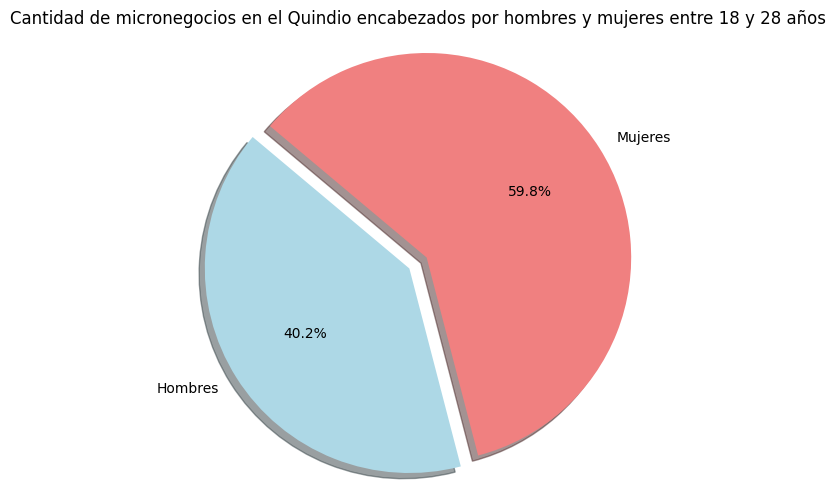

In [128]:
# 1. CALCULE LA CANTIDAD DE MICRONEGOCIIOS QUE HAY EN EL DEPARTARMENTO DEL QUINDIO 
# ENCABEZADA POR HOMBRES Y MUJERES ENTRE LOS 18 Y 28 AÑOS

CDAD_MICRO_Q_H_18_28 = repaso_parcial_emicron_identificacion[
    (repaso_parcial_emicron_identificacion['COD_DEPTO'] == 63) &
    (repaso_parcial_emicron_identificacion['P241'] >= 18) &
    (repaso_parcial_emicron_identificacion['P241'] <= 28) &
    (repaso_parcial_emicron_identificacion['P35'] == 1)  # 1: Hombre
    ]['F_EXP'].sum()
CDAD_MICRO_Q_M_18_28 = repaso_parcial_emicron_identificacion[
    (repaso_parcial_emicron_identificacion['COD_DEPTO'] == 63) &
    (repaso_parcial_emicron_identificacion['P241'] >= 18) &
    (repaso_parcial_emicron_identificacion['P241'] <= 28) &
    (repaso_parcial_emicron_identificacion['P35'] == 2) # 2: Mujer
    ]['F_EXP'].sum()
print(f'Cantidad de micronegocios en el Quindio encabezados por hombres entre 18 y 28 años: { CDAD_MICRO_Q_H_18_28:.1f}')
print(f'Cantidad de micronegocios en el Quindio encabezados por mujeres entre 18 y 28 años: { CDAD_MICRO_Q_M_18_28:.1f}')

# Gráfico  de pastel.
labels = ['Hombres', 'Mujeres']
sizes = [CDAD_MICRO_Q_H_18_28, CDAD_MICRO_Q_M_18_28]
colors = ['lightblue', 'lightcoral'] # Colores personalizados
explode = (0.1, 0)  # Solo "explotar" la porción de hombres
plt.figure(figsize=(8, 6)) # Tamaño de la figura
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Cantidad de micronegocios en el Quindio encabezados por hombres y mujeres entre 18 y 28 años')
plt.axis('equal')  # Igualar los ejes para que el gráfico sea un círculo perfecto
plt.show() 

In [129]:
# 2. CALCULE CIUDAD EN LA QUE EXISTEN MAS MICRONEGOCIOS ENCABEZADOS POR HOMBRES ENTRE LOS 20 Y LOS 30 AÑOS.

#Primero, filtramos el DataFrame para obtener solo los micronegocios encabezados por hombres entre 20 y 30 años.
micronegocios_hombres_20_30 = repaso_parcial_emicron_identificacion[
    (repaso_parcial_emicron_identificacion['P35'] == 1) & # 1: Hombre
    (repaso_parcial_emicron_identificacion['P241'] >= 20) &
    (repaso_parcial_emicron_identificacion['P241'] <= 30)
] 
# Segundo, agrupamos por departamento y sumamos la columna 'F_EXP' para obtener la cantidad de micronegocios en cada departamento.
micronegocios_por_departamento = micronegocios_hombres_20_30.groupby('COD_DEPTO')['F_EXP'].sum()
# Finalmente, encontramos el departamento con la mayor cantidad de micronegocios.
departamento_mas_micronegocios = micronegocios_por_departamento.idxmax()
cantidad_micronegocios = micronegocios_por_departamento.max()
print(f'El departamento con más micronegocios encabezados por hombres entre 20 y 30 años es {departamento_mas_micronegocios} con {cantidad_micronegocios:.1f} micronegocios.')


El departamento con más micronegocios encabezados por hombres entre 20 y 30 años es 5 con 69294.3 micronegocios.


Cantidad de micronegocios en el Tolima encabezados por mujeres que no tienen ayuda: 28203.2


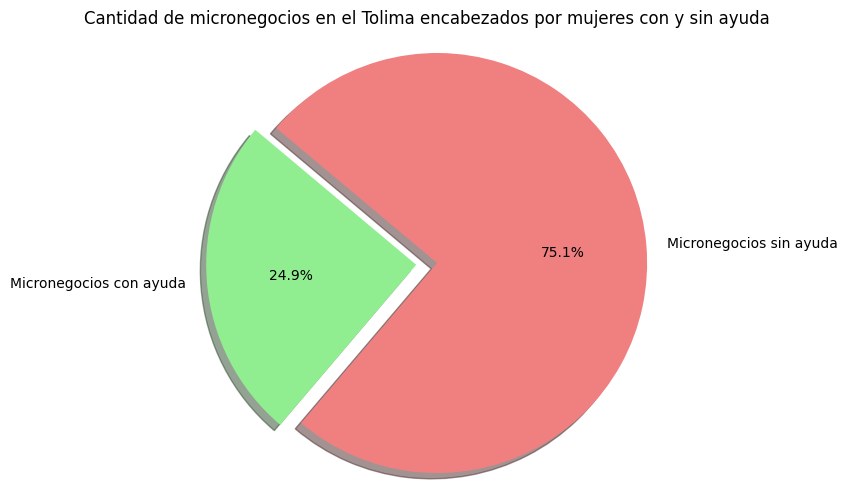

In [130]:
# 3. EN EL DEPARTAMENTO DEL TOLIMA CUANTOS MICRONEGOCIOS EXISTEN ENCABEZADOS 
#  POR MUJERES QUE NO TIENEN UNA PERSONA QUE LES AYUDE EN SU MICRONEGOCIO.

# Filtramos el DataFrame para obtener solo los micronegocios en el Tolima (COD_DEPTO = 73)
# encabezados por mujeres (P35 = 2) que no tienen ayuda (P3031 = 2) y sumamos la columna 'F_EXP'.

micronegocios_tolima_mujeres_sin_ayuda = repaso_parcial_emicron_identificacion[
    (repaso_parcial_emicron_identificacion['COD_DEPTO'] == 73) &  # 73: Tolima
    (repaso_parcial_emicron_identificacion['P35'] == 2) &  # 2: Mujer
    (repaso_parcial_emicron_identificacion['P3031'] == 2)  # 2: No tiene ayuda 
]['F_EXP'].sum()
print(f'Cantidad de micronegocios en el Tolima encabezados por mujeres que no tienen ayuda: {micronegocios_tolima_mujeres_sin_ayuda:.1f}')

#Grafica.
labels = ['Micronegocios con ayuda', 'Micronegocios sin ayuda']
sizes = [repaso_parcial_emicron_identificacion[ 
        (repaso_parcial_emicron_identificacion['COD_DEPTO'] == 73) &  # 73: Tolima 
        (repaso_parcial_emicron_identificacion['P35'] == 2) &  # 2: Mujer
        (repaso_parcial_emicron_identificacion['P3031'] != 2) # No tiene ayuda
        ]['F_EXP'].sum(), micronegocios_tolima_mujeres_sin_ayuda] 
colors = ['lightgreen', 'lightcoral'] # Colores personalizados 
explode = (0, 0.1)  # Solo "explotar" la porción de micronegocios sin ayuda 
plt.figure(figsize=(8, 6)) # Tamaño de la figura 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Cantidad de micronegocios en el Tolima encabezados por mujeres con y sin ayuda') 
plt.axis('equal')  # Igualar los ejes para que el gráfico sea un círculo perfecto
plt.show()

In [131]:
# 4. CUANTOS MICRONEGOCIOS HAY EN LA CIUDAD DE BOGOTA ENCABEZADOS POR MUJERES QUE 
# ESTEN EN EL SECTOR DE LA INDUSTRIA MANUFACTURERA.

# Primero, filtramos el DataFrame para obtener solo los micronegocios en Bogotá (COD_DEPTO = 11)
# encabezados por mujeres (P35 = 2) en el sector de la industria manufacturera (GRUPOS12 = 3).
MGCIOS_BTA_M_IM = repaso_parcial_emicron_identificacion[
    (repaso_parcial_emicron_identificacion['COD_DEPTO'] == 11) &  # 11: Bogotá
    (repaso_parcial_emicron_identificacion['P35'] == 2) &  # 2: Mujer
    (repaso_parcial_emicron_identificacion['GRUPOS12'] == 3)  # 3: Industria manufacturera
]['F_EXP'].sum()
print(f'Cantidad de micronegocios en Bogotá encabezados por mujeres en el sector de la industria manufacturera: {MGCIOS_BTA_M_IM:.1f}')


Cantidad de micronegocios en Bogotá encabezados por mujeres en el sector de la industria manufacturera: 24601.1


In [132]:
# 5. CREAR UN CODIGO A GUSTO EN FORMA DE PREGUNTA CON DOS VARIABLES.

# Pregunta: MICRONEGOSCIOS ENCABEZADOS POR MUJERES DE 40 EN ADELANTE EN EL DEPARTAMENTO DEL VALLE DEL CAUCA EN EL SECTOR DEL AGRO.

# Filtramos el DataFrame para obtener solo los micronegocios en el Valle del Cauca (COD_DEPTO = 76)
# encabezados por mujeres (P35 = 2) de 40 años en adelante (P241 >= 40) en el sector del agro (GRUPOS12 = 1).

MGCIOS_VC_M_40A_AGRO = repaso_parcial_emicron_identificacion[
    (repaso_parcial_emicron_identificacion['COD_DEPTO'] == 76) &  # 76: Valle del Cauca
    (repaso_parcial_emicron_identificacion['P35'] == 2) &  # 2: Mujer 
    (repaso_parcial_emicron_identificacion['P241'] >= 40) &  # 40 años en adelante
    (repaso_parcial_emicron_identificacion['GRUPOS12'] == 1)  # 1: Sector del agro
]['F_EXP'].sum()
print(f'Cantidad de micronegocios en el Valle del Cauca encabezados por mujeres de 40 años en adelante en el sector del agro: {MGCIOS_VC_M_40A_AGRO:.1f}')


Cantidad de micronegocios en el Valle del Cauca encabezados por mujeres de 40 años en adelante en el sector del agro: 5463.9
